# Week 17 Homework: Tree-Based Models

### Using ONE of the following sources, complete the questions for only that source.

### Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since its not binary like the others, but if you really want to master these concepts, you should pick this one. 

### Note: at least one of your models should have the most relevant performance metric above .90. All performance metrics should be above .75. You will partially be graded on model performance.

In [21]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

In [18]:
abalone_df = pd.read_csv("abalone.data", names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [20]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 1.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t.

In [32]:
#Preprocessing: Integer encoding in "Sex" column
sex_map = {"I":0, "F":1, "M":2}
abalone_df["Sex"] = abalone_df["Sex"].map(sex_map)
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [211]:
#Add an "Age" column, calculated by number of rings plus 1.5
abalone_df['Age'] = abalone_df.Rings+1.5

In [212]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 326.5 KB


In [213]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [260]:
X = abalone_df.drop('Age', axis=1)
y = abalone_df['Age']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Preprocessing: Standardize (StandardScaler)
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### 2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [370]:
import time
tic = time.perf_counter()

# decision tree classifier
dt = tree.DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state=42)

dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
predictions_dt = [round(value) for value in y_pred_dt]
#Do I need the line above this one???

toc = time.perf_counter()
difference = toc - tic
print(difference)

0.028101132000301732


In [364]:
dt.score(X_test, y_test)

0.9139149246444377

In [349]:
print(dt.feature_importances_, X.columns)

[0.         0.         0.         0.         0.         0.
 0.         0.00103912 0.99896088] Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [350]:
from sklearn.metrics import mean_squared_error as MSE
mse_dt = MSE(y_test, y_pred_dt)
print(mse_dt)

0.9318890225116134


In [351]:
rmse_dt = mse_dt ** (1/2)
print(rmse_dt)

0.9653439918037577


In [352]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dt)

0.9139149246444377

In [353]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_dt)

0.9139576251502207

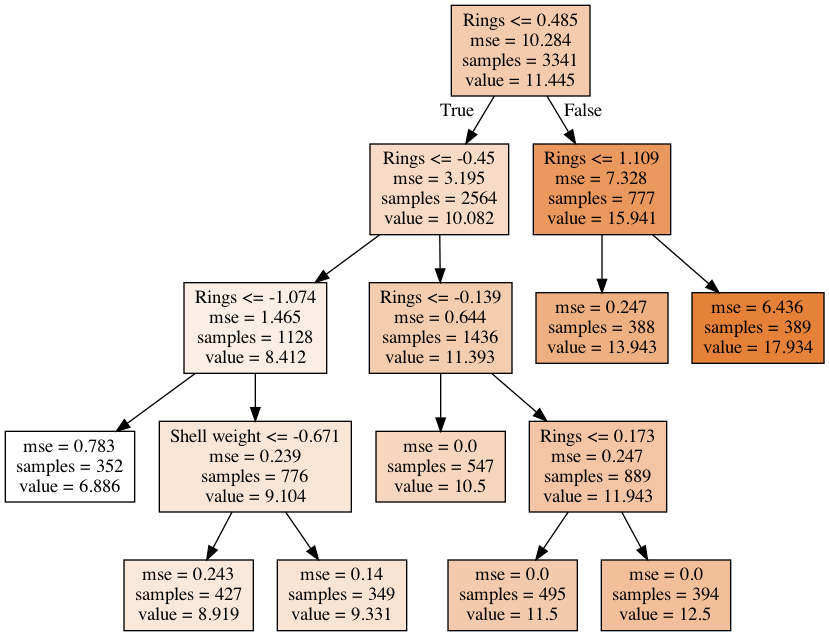

In [354]:
dot_data = tree.export_graphviz(
    dt, out_file =None, feature_names=X.columns, class_names = ["0","1","2"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [374]:
from sklearn.ensemble import RandomForestRegressor

tic = time.perf_counter()

rf = RandomForestRegressor(n_estimators=100, random_state =42)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
predictions_rf = [round(value) for value in y_pred_rf]
#Do I need the line above this one???

toc = time.perf_counter()
difference = toc - tic
print(difference)

0.5004410789997564


In [366]:
rf.score(X_test, y_test)

#predictions = rf.predict(X_test)
#print(classification_report(y_test, predictions))

0.9998458100351905

In [331]:
print(rf.feature_importances_, X.columns)

[1.09231565e-05 4.38013879e-05 7.01587003e-05 5.94683624e-05
 2.61547131e-05 5.57684438e-05 2.61802379e-05 3.70852777e-05
 9.99670460e-01] Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [332]:
mse_rf = MSE(y_test, y_pred_rf)
print(mse_rf)

0.00166913875598086


In [333]:
rmse_rf = mse_rf ** (1/2)
print(rmse_rf)

0.04085509461475839


In [334]:
r2_score(y_test, y_pred_rf)

0.9998458100351905

In [335]:
explained_variance_score(y_test, y_pred_rf)

0.9998458711531629

In [285]:
#look at the random forest documentation to improve the model
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### 4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.

In [373]:
#XGBoost
#sudo pip install xgboost
from xgboost import XGBRegressor

tic = time.perf_counter()

#fit model no training data
gb = XGBRegressor()

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
predictions_gb = [round(value) for value in y_pred_gb]
#Do I need the line above this one???

toc = time.perf_counter()
difference = toc - tic
print(difference)

0.24861766600042756


In [361]:
gb.score(X_test, y_test)

0.9999998706186528

In [340]:
gb.score(X_test, y_test)

0.9999998706186528

In [341]:
print(gb.feature_importances_, X.columns)

[0.0000000e+00 1.3980377e-03 7.4563227e-09 3.4718082e-06 2.3914779e-06
 5.4745669e-07 0.0000000e+00 2.1537997e-05 9.9857402e-01] Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [342]:
mse_gb = MSE(y_test, y_pred_gb)
print(mse_gb)

1.4005802599054018e-06


In [343]:
rmse_gb = mse_gb ** (1/2)
print(rmse_gb)

0.0011834611357815692


In [344]:
r2_score(y_test, y_pred_gb)

0.9999998706186528

In [345]:
explained_variance_score(y_test, y_pred_gb)

0.9999998706416341

In [346]:
toc = time.perf_counter()
difference = toc - tic
print(difference)

11.297723934000715


### 5.	Which model performed best? What is your performance metric? Why?

The xgboost model performed the best, based on r2 score (0.9999998706186528) and explained variance score (explained_variance_score). However, the random forest model's scores were extemely close (r2 = 0.9998458100351905; explained variance = 0.9998458711531629). The decision tree scores were somewhat lower but still very good (r2 = 0.9139149246444377; explained variance = 0.9139576251502207). However, the random forest model took about twice as long as the xgboost model. The decision tree model was much faster than the others. It took about one tenth as long as the xgboost model, making it far less "expensive." But with this amount of data, I would still choose the xgboost model because of its high r2 and explained variance scores because 0.25 seconds is still fast. If I had an extremely large set of data, I might choose the decision tree model because it would be far less time consuming to run and would still produce decently high scores.